In [22]:
# import packages
import pandas as pd
import warnings
import plotly
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
warnings.simplefilter("ignore")
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import plotly.graph_objs as go
from plotly.offline import plot,init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)


In [23]:
# reading csv file into dataframe
# Set path of input file
df = pd.read_csv("C:\\Users\\SurabhiGupta\\Desktop\\Daimler\\Input Data\\Al Prices.csv")
print(df.head())

# Convert Date column to date format
df['Date'] = pd.to_datetime(df['Date'],format='%d-%m-%Y')

# Setting Date column as index
df.set_index('Date', inplace=True)
print(df.head())

         Date   Prices
0  01-01-2009  1448.74
1  01-02-2009  1367.93
2  01-03-2009  1373.02
3  01-04-2009  1458.65
4  01-05-2009  1497.39
             Prices
Date               
2009-01-01  1448.74
2009-02-01  1367.93
2009-03-01  1373.02
2009-04-01  1458.65
2009-05-01  1497.39


In [24]:
# decompose series into trend, seasonality and irregularity
# from mathmodels.forecast import timeseriesplots

from timeseriesplots import timeseriesplots
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

# STL Decompose
trend,seasonality,irregularity = df.timeseriesplots.stl('Prices',model='additive',filt=None,freq=None,two_sided=True,
                                                        extrapolate_trend=0)
trendFigure, seasonalityFigure, irregularityFigure = df.timeseriesplots.stlFigure(trend,seasonality,irregularity)
iplot(trendFigure)
iplot(seasonalityFigure)
iplot(irregularityFigure)

In [25]:
# Split Time Series into Training & Test Sets 

# for 2 Year Test Set
dfTrain_2y = df[:108]
dfTest_2y = df[108:]
print(dfTrain_2y)
print(dfTest_2y)

# for 1 Year Test Set
dfTrain_1y = df[:120]
dfTest_1y = df[120:]
print(dfTrain_1y)
print(dfTest_1y)

             Prices
Date               
2009-01-01  1448.74
2009-02-01  1367.93
2009-03-01  1373.02
2009-04-01  1458.65
2009-05-01  1497.39
...             ...
2017-08-01  2035.43
2017-09-01  2125.69
2017-10-01  2148.50
2017-11-01  2117.02
2017-12-01  2087.34

[108 rows x 1 columns]
             Prices
Date               
2018-01-01  2221.67
2018-02-01  2173.82
2018-03-01  2094.90
2018-04-01  2245.73
2018-05-01  2288.64
2018-06-01  2237.24
2018-07-01  2076.32
2018-08-01  2070.59
2018-09-01  2055.20
2018-10-01  2044.93
2018-11-01  1950.02
2018-12-01  1928.63
2019-01-01  1861.55
2019-02-01  1885.05
2019-03-01  1895.33
2019-04-01  1868.28
2019-05-01  1805.55
2019-06-01  1782.02
2019-07-01  1816.33
2019-08-01  1771.12
2019-09-01  1776.76
2019-10-01  1727.57
2019-11-01  1766.36
             Prices
Date               
2009-01-01  1448.74
2009-02-01  1367.93
2009-03-01  1373.02
2009-04-01  1458.65
2009-05-01  1497.39
...             ...
2018-08-01  2070.59
2018-09-01  2055.20
2018-10-01  2044

In [26]:
# Single Exponential Smoothing
#from mathmodels.forecast import expsmoothing
from expsmoothing import expsmoothing

# Building and fitting model for 2 Year Test Set
expSmoothingModel_2y = dfTrain_2y.expsmoothing.build('Prices',smoothing_level=0.1)

# Return Forecast values
Forecast_2y=pd.DataFrame(expSmoothingModel_2y.forecast(23))
Forecast_2y.columns=['Prediction']
print(Forecast_2y)

# calculate 2 year mape
ape_2y =  abs(dfTest_2y['Prices'] - Forecast_2y['Prediction'])/dfTest_2y['Prices']
mape_2y = (sum(ape_2y)/len(ape_2y))*100
print(mape_2y)



# Building and fitting model for 1 Year Test Set
expSmoothingModel_1y = dfTrain_1y.expsmoothing.build('Prices',smoothing_level=0.1)

# Return Forecast values
Forecast_1y=pd.DataFrame(expSmoothingModel_1y.forecast(11))
Forecast_1y.columns=['Prediction']
print(Forecast_1y)

# calculate 1 year mape
ape_1y =  abs(dfTest_1y['Prices'] - Forecast_1y['Prediction'])/dfTest_1y['Prices']
mape_1y = (sum(ape_1y)/len(ape_1y))*100
print(mape_1y)



            Prediction
2018-01-01  1914.62442
2018-02-01  1914.62442
2018-03-01  1914.62442
2018-04-01  1914.62442
2018-05-01  1914.62442
2018-06-01  1914.62442
2018-07-01  1914.62442
2018-08-01  1914.62442
2018-09-01  1914.62442
2018-10-01  1914.62442
2018-11-01  1914.62442
2018-12-01  1914.62442
2019-01-01  1914.62442
2019-02-01  1914.62442
2019-03-01  1914.62442
2019-04-01  1914.62442
2019-05-01  1914.62442
2019-06-01  1914.62442
2019-07-01  1914.62442
2019-08-01  1914.62442
2019-09-01  1914.62442
2019-10-01  1914.62442
2019-11-01  1914.62442
7.514129258095424
             Prediction
2019-01-01  2034.738581
2019-02-01  2034.738581
2019-03-01  2034.738581
2019-04-01  2034.738581
2019-05-01  2034.738581
2019-06-01  2034.738581
2019-07-01  2034.738581
2019-08-01  2034.738581
2019-09-01  2034.738581
2019-10-01  2034.738581
2019-11-01  2034.738581
12.25340007565589


In [27]:
# Holt's Winter method
#from mathmodels.forecast import holtwinter
from holtwinter import holtwinter

# Building and fitting model for 2 Year Test Set
holtWinterModel_2y = dfTrain_2y.holtwinter.build('Prices', trend='add')

# Scoring model on Testing set
holtWinterDfTest_2y = dfTest_2y.holtwinter.scoreTest(holtWinterModel_2y, 'Prices')
print(holtWinterDfTest_2y)

# calculate 2 year mape for testing set
ape_2y =  abs(holtWinterDfTest_2y['Prices'] - holtWinterDfTest_2y['predicted'])/holtWinterDfTest_2y['Prices']
mape_2y = (sum(ape_2y)/len(ape_2y))*100
print(mape_2y)



# Building and fitting model for 1 Year Test Set
holtWinterModel_1y = dfTrain_1y.holtwinter.build('Prices', trend='add')

# Scoring model on Testing set
holtWinterDfTest_1y = dfTest_1y.holtwinter.scoreTest(holtWinterModel_1y, 'Prices')
print(holtWinterDfTest_1y)

# calculate 1 year mape for testing set
ape_1y =  abs(holtWinterDfTest_1y['Prices'] - holtWinterDfTest_1y['predicted'])/holtWinterDfTest_1y['Prices']
mape_1y = (sum(ape_1y)/len(ape_1y))*100
print(mape_1y)


             Prices    predicted
Date                            
2018-01-01  2221.67  2102.109686
2018-02-01  2173.82  2116.984169
2018-03-01  2094.90  2131.964196
2018-04-01  2245.73  2147.050517
2018-05-01  2288.64  2162.243889
2018-06-01  2237.24  2177.545072
2018-07-01  2076.32  2192.954835
2018-08-01  2070.59  2208.473950
2018-09-01  2055.20  2224.103196
2018-10-01  2044.93  2239.843355
2018-11-01  1950.02  2255.695217
2018-12-01  1928.63  2271.659577
2019-01-01  1861.55  2287.737236
2019-02-01  1885.05  2303.929000
2019-03-01  1895.33  2320.235681
2019-04-01  1868.28  2336.658096
2019-05-01  1805.55  2353.197071
2019-06-01  1782.02  2369.853433
2019-07-01  1816.33  2386.628019
2019-08-01  1771.12  2403.521669
2019-09-01  1776.76  2420.535233
2019-10-01  1727.57  2437.669562
2019-11-01  1766.36  2454.925517
18.48628670925679
             Prices    predicted
Date                            
2019-01-01  1861.55  1933.028520
2019-02-01  1885.05  1937.433280
2019-03-01  1895.33  1941

In [28]:
# Seasonal ARIMA
#from mathmodels.forecast import sarima
from sarima import sarima

# Building and fitting model for 2 year test set
sarimaModel_2y = dfTrain_2y.sarima.build('Prices', order = (1,2,1), seasonal_order = (0,0,0,12), enforce_invertibility=False)

# Model Summary
sarimaSummary_2y = dfTrain_2y.sarima.getSummary(sarimaModel_2y)
print(sarimaSummary_2y)

# scoring model on testing set
sarimaDfTest_2y = dfTest_2y.sarima.scoreTest(sarimaModel_2y, 'Prices')
print(sarimaDfTest_2y)

# calculate 2 year mape for testing set
ape_2y =  abs(sarimaDfTest_2y['Prices'] - sarimaDfTest_2y['predicted'])/sarimaDfTest_2y['Prices']
mape_2y = (sum(ape_2y)/len(ape_2y))*100
print(mape_2y)



# Building and fitting model for 1 year test set
sarimaModel_1y = dfTrain_1y.sarima.build('Prices', order = (1,2,1), seasonal_order = (0,0,0,12), enforce_invertibility=False)

# Model Summary
sarimaSummary_1y = dfTrain_1y.sarima.getSummary(sarimaModel_1y)
print(sarimaSummary_1y)

# scoring model on testing set
sarimaDfTest_1y = dfTest_1y.sarima.scoreTest(sarimaModel_1y, 'Prices')
print(sarimaDfTest_1y)

# calculate 1 year mape for testing set
ape_1y =  abs(sarimaDfTest_1y['Prices'] - sarimaDfTest_1y['predicted'])/sarimaDfTest_1y['Prices']
mape_1y = (sum(ape_1y)/len(ape_1y))*100
print(mape_1y)



                           Statespace Model Results                           
Dep. Variable:                 Prices   No. Observations:                  108
Model:               SARIMAX(1, 2, 1)   Log Likelihood                -625.788
Date:                Fri, 20 Dec 2019   AIC                           1257.577
Time:                        16:22:23   BIC                           1265.567
Sample:                    01-01-2009   HQIC                          1260.815
                         - 12-01-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1438      0.096      1.501      0.133      -0.044       0.332
ma.L1         -1.0087      0.098    -10.318      0.000      -1.200      -0.817
sigma2      7481.4526   1147.403      6.520      0.0

(<class 'statsmodels.iolib.summary.Summary'>
"""
                        Unobserved Components Results                         
Dep. Variable:                 Prices   No. Observations:                  108
Model:                    random walk   Log Likelihood                -579.522
                       + seasonal(12)   AIC                           1161.044
Date:                Fri, 20 Dec 2019   BIC                           1163.608
Time:                        16:22:30   HQIC                          1162.080
Sample:                    01-01-2009                                         
                         - 12-01-2017                                         
Covariance Type:                  opg                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
sigma2.level  7899.9300   1123.247      7.033      0.000    5698.406    1.01e+

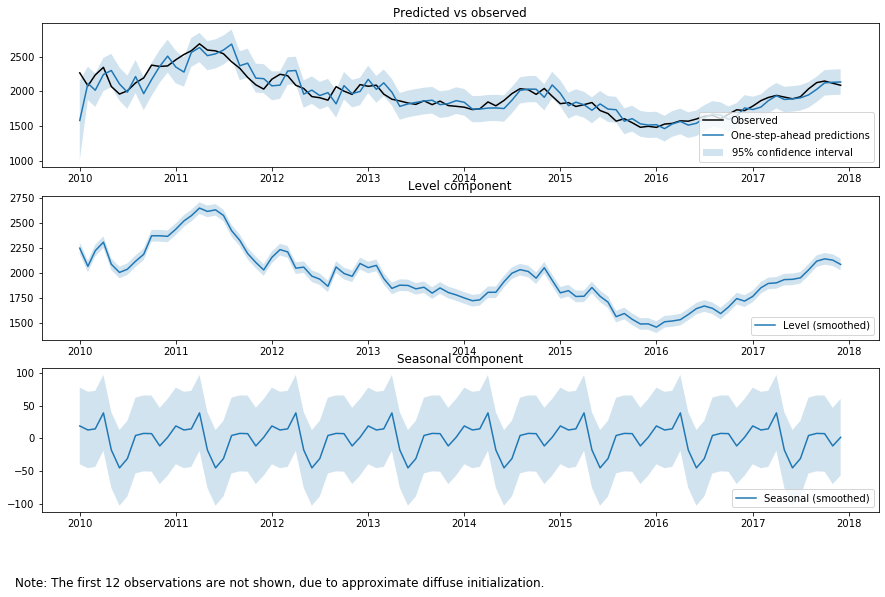

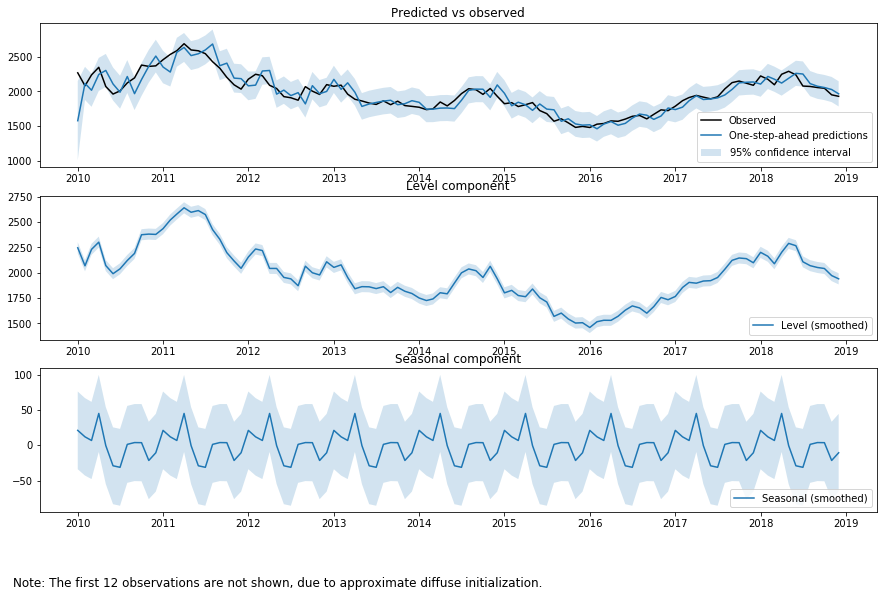

In [29]:
# Unobserved Component Model (random walk)

#from mathmodels.forecast import ucm
from ucm import ucm

# Building and fitting model for 2 year Test Set
ucmModel_2y = dfTrain_2y.ucm.build('Prices', level='rwalk', trend=True, seasonal = 12, stochastic_seasonal=False, cycle= False,irregular=True, maxiter=10)

# Model Summary
ucmSummary_2y = dfTrain_2y.ucm.getSummary(ucmModel_2y)
print(ucmSummary_2y)

# scoring model on testing set
ucmDfTest_2y = dfTest_2y.ucm.scoreTest(ucmModel_2y, 'Prices')
print(ucmDfTest_2y)

# calculate 2 year mape for testing set
ape_2y =  abs(ucmDfTest_2y['Prices'] - ucmDfTest_2y['predicted'])/ucmDfTest_2y['Prices']
mape_2y = (sum(ape_2y)/len(ape_2y))*100
print(mape_2y)



# Building and fitting model for 1 year Test Set
ucmModel_1y = dfTrain_1y.ucm.build('Prices', level='rwalk', trend=True, seasonal = 12, stochastic_seasonal=False, cycle= False,irregular=True, maxiter=10)

# Model Summary
ucmSummary_1y = dfTrain_1y.ucm.getSummary(ucmModel_1y)
print(ucmSummary_1y)

# scoring model on testing set
ucmDfTest_1y = dfTest_1y.ucm.scoreTest(ucmModel_1y, 'Prices')
print(ucmDfTest_1y)

# calculate 1 year mape for testing set
ape_1y =  abs(ucmDfTest_1y['Prices'] - ucmDfTest_1y['predicted'])/ucmDfTest_1y['Prices']
mape_1y = (sum(ape_1y)/len(ape_1y))*100
print(mape_1y)



(<class 'statsmodels.iolib.summary.Summary'>
"""
                        Unobserved Components Results                         
Dep. Variable:                 Prices   No. Observations:                  108
Model:                    local level   Log Likelihood                -579.522
                       + seasonal(12)   AIC                           1163.044
Date:                Fri, 20 Dec 2019   BIC                           1168.173
Time:                        16:22:36   HQIC                          1165.117
Sample:                    01-01-2009                                         
                         - 12-01-2017                                         
Covariance Type:                  opg                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
sigma2.irregular     0.0018    775.569   2.34e-06      1.000   -1520.0

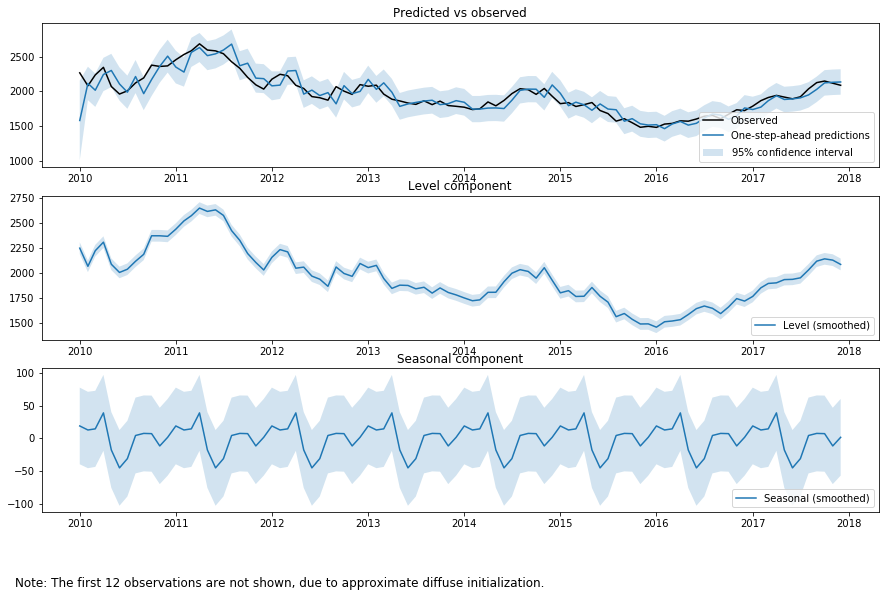

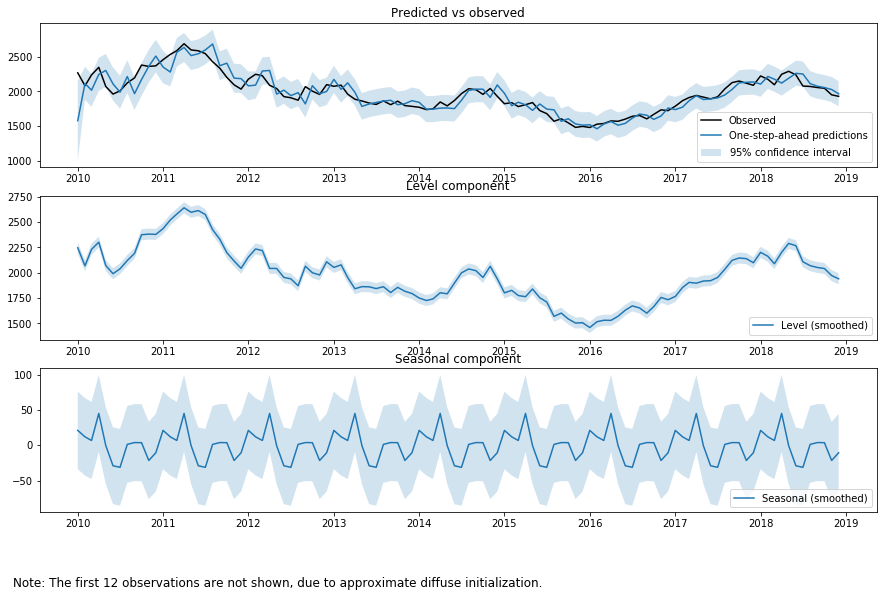

In [30]:
# Unobserved Component Model (local level)

#from mathmodels.forecast import ucm
from ucm import ucm

# Building and fitting model for 2 year Test Set
ucmModel_2y = dfTrain_2y.ucm.build('Prices', level='llevel', trend=True, seasonal = 12, stochastic_seasonal=False, cycle= False,irregular=True, maxiter=10)

# Model Summary
ucmSummary_2y = dfTrain_2y.ucm.getSummary(ucmModel_2y)
print(ucmSummary_2y)

# scoring model on testing set
ucmDfTest_2y = dfTest_2y.ucm.scoreTest(ucmModel_2y, 'Prices')
print(ucmDfTest_2y)

# calculate 2 year mape for testing set
ape_2y =  abs(ucmDfTest_2y['Prices'] - ucmDfTest_2y['predicted'])/ucmDfTest_2y['Prices']
mape_2y = (sum(ape_2y)/len(ape_2y))*100
print(mape_2y)



# Building and fitting model for 1 year Test Set
ucmModel_1y = dfTrain_1y.ucm.build('Prices', level='llevel', trend=True, seasonal = 12, stochastic_seasonal=False, cycle= False,irregular=True, maxiter=10)

# Model Summary
ucmSummary_1y = dfTrain_1y.ucm.getSummary(ucmModel_1y)
print(ucmSummary_1y)

# Scoring model on testing set
ucmDfTest_1y = dfTest_1y.ucm.scoreTest(ucmModel_1y, 'Prices')
print(ucmDfTest_1y)

# calculate 1 year mape for testing set
ape_1y =  abs(ucmDfTest_1y['Prices'] - ucmDfTest_1y['predicted'])/ucmDfTest_1y['Prices']
mape_1y = (sum(ape_1y)/len(ape_1y))*100
print(mape_1y)


(<class 'statsmodels.iolib.summary.Summary'>
"""
                        Unobserved Components Results                         
Dep. Variable:                 Prices   No. Observations:                  108
Model:                   smooth trend   Log Likelihood                -583.890
                       + seasonal(12)   AIC                           1171.780
Date:                Fri, 20 Dec 2019   BIC                           1176.888
Time:                        16:22:42   HQIC                          1173.844
Sample:                    01-01-2009                                         
                         - 12-01-2017                                         
Covariance Type:                  opg                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
sigma2.irregular  2623.4253    528.362      4.965      0.000    1587.8

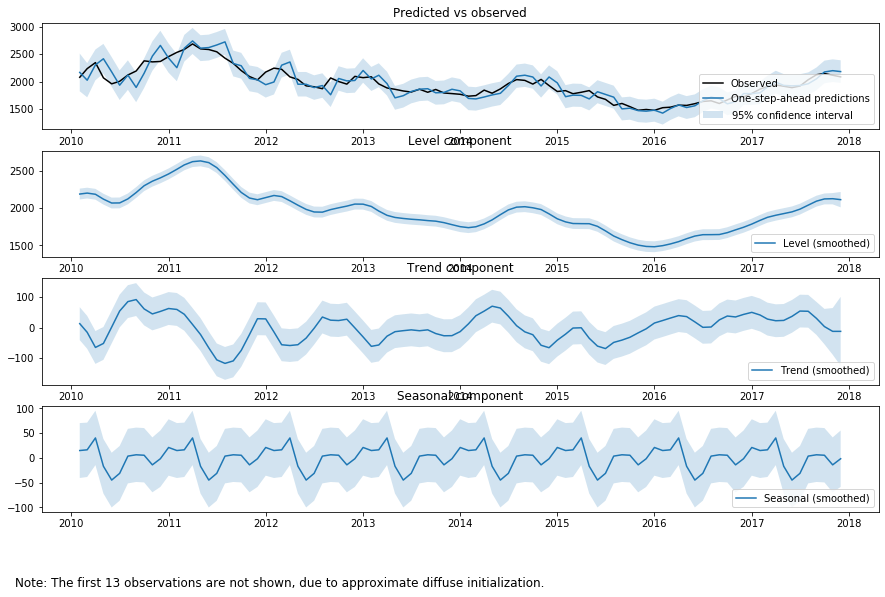

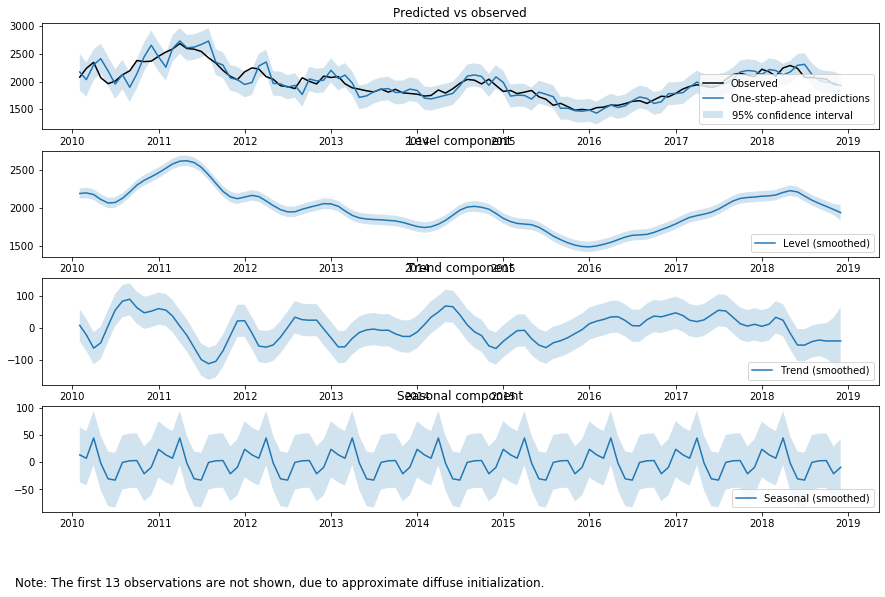

In [31]:
# Unobserved Component Model (smooth trend)

#from mathmodels.forecast import ucm
from ucm import ucm

# Building and fitting model for 2 year Test Set
ucmModel_2y = dfTrain_2y.ucm.build('Prices', level='strend', trend=True, seasonal = 12, stochastic_seasonal=False, cycle= False,irregular=True, maxiter=10)

# Model Summary
ucmSummary_2y = dfTrain_2y.ucm.getSummary(ucmModel_2y)
print(ucmSummary_2y)

# scoring model on testing set
ucmDfTest_2y = dfTest_2y.ucm.scoreTest(ucmModel_2y, 'Prices')
print(ucmDfTest_2y)

# calculate 2 year mape on testing set
ape_2y =  abs(ucmDfTest_2y['Prices'] - ucmDfTest_2y['predicted'])/ucmDfTest_2y['Prices']
mape_2y = (sum(ape_2y)/len(ape_2y))*100
print(mape_2y)



# Building and fitting model for 1 year Test Set
ucmModel_1y = dfTrain_1y.ucm.build('Prices', level='strend', trend=True, seasonal = 12, stochastic_seasonal=False, cycle= False,irregular=True, maxiter=10)

# Model Summary
ucmSummary_1y = dfTrain_1y.ucm.getSummary(ucmModel_1y)
print(ucmSummary_1y)

# scoring model on testing set
ucmDfTest_1y = dfTest_1y.ucm.scoreTest(ucmModel_1y, 'Prices')
print(ucmDfTest_1y)

# calculate 1 year mape for testing set
ape_1y =  abs(ucmDfTest_1y['Prices'] - ucmDfTest_1y['predicted'])/ucmDfTest_1y['Prices']
mape_1y = (sum(ape_1y)/len(ape_1y))*100
print(mape_1y)


In [32]:
# ARIMA (1,1,1)

#from mathmodels.forecast import arima
from arima import arima

# Building and fitting model for 2 year test set
arimaModel_2y = dfTrain_2y.arima.build('Prices', order = (1,1,1))

# Model Summary
arimaSummary_2y = dfTrain_2y.arima.getSummary(arimaModel_2y)
print(arimaSummary_2y)

# scoring model on training set
arimaDfTrain_2y = dfTrain_2y.arima.scoreTrain(arimaModel_2y, 'Prices')
print(arimaDfTrain_2y)

# scoring model on testing set
arimaDfTest_2y = dfTest_2y.arima.scoreTest(arimaModel_2y, 'Prices')
print(arimaDfTest_2y)

# calculate 2 year mape on testing set
ape_2y =  abs(arimaDfTest_2y['Prices'] - arimaDfTest_2y['predicted'])/arimaDfTest_2y['Prices']
mape_2y = (sum(ape_2y)/len(ape_2y))*100
print(mape_2y)


# Building and fitting model for 1 year test set
arimaModel_1y = dfTrain_1y.arima.build('Prices', order = (1,1,1))

# Model Summary
arimaSummary_1y = dfTrain_1y.arima.getSummary(arimaModel_1y)
print(arimaSummary_1y)

# scoring model on training set
arimaDfTrain_1y = dfTrain_1y.arima.scoreTrain(arimaModel_1y, 'Prices')
print(arimaDfTrain_1y)

# scoring model on testing set
arimaDfTest_1y = dfTest_1y.arima.scoreTest(arimaModel_1y, 'Prices')
print(arimaDfTest_1y)

# calculate 1 year mape on testing set
ape_1y =  abs(arimaDfTest_1y['Prices'] - arimaDfTest_1y['predicted'])/arimaDfTest_1y['Prices']
mape_1y = (sum(ape_1y)/len(ape_1y))*100
print(mape_1y)




                             ARIMA Model Results                              
Dep. Variable:               D.Prices   No. Observations:                  107
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -628.860
Method:                       css-mle   S.D. of innovations             86.326
Date:                Fri, 20 Dec 2019   AIC                           1265.720
Time:                        16:22:48   BIC                           1276.411
Sample:                    02-01-2009   HQIC                          1270.054
                         - 12-01-2017                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              5.8744      9.280      0.633      0.528     -12.315      24.063
ar.L1.D.Prices    -0.2928      0.497     -0.589      0.557      -1.267       0.682
ma.L1.D.Prices     0.4385      0.465

In [33]:
# Recommended method 3
# ARIMA (1,2,1)

#from mathmodels.forecast import arima
from arima import arima

# Building and fitting model for 2 year test set
arimaModel_2y = dfTrain_2y.arima.build('Prices', order = (1,2,1))

# Model Summary
arimaSummary_2y = dfTrain_2y.arima.getSummary(arimaModel_2y)
print(arimaSummary_2y)

# scoring model on training set
arimaDfTrain_2y = dfTrain_2y.arima.scoreTrain(arimaModel_2y, 'Prices')
print(arimaDfTrain_2y)

# scoring model on testing set
arimaDfTest_2y = dfTest_2y.arima.scoreTest(arimaModel_2y, 'Prices')
print(arimaDfTest_2y)

# calculate 2 year mape on testing set
ape_2y =  abs(arimaDfTest_2y['Prices'] - arimaDfTest_2y['predicted'])/arimaDfTest_2y['Prices']
mape_2y = (sum(ape_2y)/len(ape_2y))*100
print(mape_2y)



# Building and fitting model for 1 year test set
arimaModel_1y = dfTrain_1y.arima.build('Prices', order = (1,2,1))

# Model Summary
arimaSummary_1y = dfTrain_1y.arima.getSummary(arimaModel_1y)
print(arimaSummary_1y)

# scoring model on training set
arimaDfTrain_1y = dfTrain_1y.arima.scoreTrain(arimaModel_1y, 'Prices')
print(arimaDfTrain_1y)

# scoring model on testing set
arimaDfTest_1y = dfTest_1y.arima.scoreTest(arimaModel_1y, 'Prices')
print(arimaDfTest_1y)

# calculate 1 year mape on testing set
ape_1y =  abs(arimaDfTest_1y['Prices'] - arimaDfTest_1y['predicted'])/arimaDfTest_1y['Prices']
mape_1y = (sum(ape_1y)/len(ape_1y))*100
print(mape_1y)



                             ARIMA Model Results                              
Dep. Variable:              D2.Prices   No. Observations:                  106
Model:                 ARIMA(1, 2, 1)   Log Likelihood                -625.754
Method:                       css-mle   S.D. of innovations             86.808
Date:                Fri, 20 Dec 2019   AIC                           1259.508
Time:                        16:22:53   BIC                           1270.162
Sample:                    03-01-2009   HQIC                          1263.826
                         - 12-01-2017                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.1711      0.315     -0.542      0.589      -0.789       0.447
ar.L1.D2.Prices     0.1426      0.097      1.470      0.145      -0.048       0.333
ma.L1.D2.Prices    -1.0000      

In [34]:
# ARIMAX with External Event
#from mathmodels.forecast import arima
from arima import arima

# reading exogenous file into dataframe
# Set path of input file
df_X = pd.read_csv("C:\\Users\\SurabhiGupta\\Desktop\\Daimler\\Input Data\\exogenous.csv")
print(df_X.head())

# Convert Date column to date format
df_X['Date'] = pd.to_datetime(df_X['Date'],format='%d-%m-%Y')

# Setting Date column as index
df_X.set_index('Date', inplace=True)
print(df_X.head())

# Split Exog into Training & Test Datasets

# for 2 Year Test Set
dfTrain_X_2y = df_X[:108]
dfTest_X_2y = df_X[108:]
print(dfTrain_X_2y)
print(dfTest_X_2y)

# for 1 Year Test Set
dfTrain_X_1y = df_X[:120]
dfTest_X_1y = df_X[120:]
print(dfTrain_X_1y)
print(dfTest_X_1y)


# Building and fitting model for 2 year test set
arimaModel_2y = dfTrain_2y.arima.build('Prices', order = (1,0,1),exog=dfTrain_X_2y[['Event']])

# Model Summary
arimaSummary_2y = dfTrain_2y.arima.getSummary(arimaModel_2y)
print(arimaSummary_2y)

# scoring model on training set
arimaDfTrain_2y = dfTrain_2y.arima.scoreTrain(arimaModel_2y, 'Prices')
print(arimaDfTrain_2y)

# Forecasted value will be returned
Forecast_2y = arimaModel_2y.forecast(len(dfTest_X_2y[['Event']]),exog=dfTest_X_2y[['Event']])
Forecast_2y = pd.DataFrame({'Prediction': Forecast_2y[0]})
# Setting index
Forecast_2y.set_index(dfTest_2y.index,inplace=True)
print(Forecast_2y)


# calculate 2 year mape for testing set
ape_2y =  abs(dfTest_2y['Prices'] - Forecast_2y['Prediction'])/dfTest_2y['Prices']
mape_2y = (sum(ape_2y)/len(ape_2y))*100
print(mape_2y)





# Building and fitting model for 1 year test set
arimaModel_1y = dfTrain_1y.arima.build('Prices', order = (1,0,1),exog=dfTrain_X_1y[['Event']])

# Model Summary
arimaSummary_1y = dfTrain_1y.arima.getSummary(arimaModel_1y)
print(arimaSummary_1y)

# scoring model on training set
arimaDfTrain_1y = dfTrain_1y.arima.scoreTrain(arimaModel_1y, 'Prices')
print(arimaDfTrain_1y)


# Forecasted value will be returned
Forecast_1y = arimaModel_1y.forecast(len(dfTest_X_1y[['Event']]),exog=dfTest_X_1y[['Event']])
Forecast_1y = pd.DataFrame({'Prediction': Forecast_1y[0]})
# Setting index
Forecast_1y.set_index(dfTest_1y.index,inplace=True)
print(Forecast_1y)

# calculate 1 year mape on testing set
ape_1y =  abs(dfTest_1y['Prices'] - Forecast_1y['Prediction'])/dfTest_1y['Prices']
mape_1y = (sum(ape_1y)/len(ape_1y))*100
print(mape_1y)



         Date  Chinese PMI  USDI_lag1  Crude Oil  Event
0  01-01-2009         45.3      82.15      43.75      0
1  01-02-2009         49.0      86.46      42.94      0
2  01-03-2009         52.4      88.15      46.58      0
3  01-04-2009         53.5      85.90      50.30      0
4  01-05-2009         53.1      84.78      57.20      0
            Chinese PMI  USDI_lag1  Crude Oil  Event
Date                                                
2009-01-01         45.3      82.15      43.75      0
2009-02-01         49.0      86.46      42.94      0
2009-03-01         52.4      88.15      46.58      0
2009-04-01         53.5      85.90      50.30      0
2009-05-01         53.1      84.78      57.20      0
            Chinese PMI  USDI_lag1  Crude Oil  Event
Date                                                
2009-01-01         45.3      82.15      43.75      0
2009-02-01         49.0      86.46      42.94      0
2009-03-01         52.4      88.15      46.58      0
2009-04-01         53.5     

             Prices    predicted
Date                            
2009-01-01  1448.74  1887.514871
2009-02-01  1367.93  1468.033414
2009-03-01  1373.02  1382.747898
2009-04-01  1458.65  1400.617272
2009-05-01  1497.39  1491.428186
...             ...          ...
2018-08-01  2070.59  2062.077114
2018-09-01  2055.20  2061.516662
2018-10-01  2044.93  2044.803591
2018-11-01  1950.02  2036.065336
2018-12-01  1928.63  1933.776553

[120 rows x 2 columns]
             Prediction
Date                   
2019-01-01  1925.549188
2019-02-01  1923.402813
2019-03-01  1921.377563
2019-04-01  1919.466603
2019-05-01  1917.663484
2019-06-01  1915.962119
2019-07-01  1914.356767
2019-08-01  1912.842009
2019-09-01  1911.412733
2019-10-01  1910.064114
2019-11-01  1908.791602
5.719713037086205


In [35]:
# ARIMA for USDI_lag1 & ARIMAX with USDI_lag1

#from mathmodels.forecast import arima
from arima import arima

# reading exogenous file into dataframe
# Set path of input file
df_X = pd.read_csv("C:\\Users\\SurabhiGupta\\Desktop\\Daimler\\Input Data\\exogenous.csv")
print(df_X.head())

# Convert Date column to date format
df_X['Date'] = pd.to_datetime(df_X['Date'],format='%d-%m-%Y')

# Setting Date column as index
df_X.set_index('Date', inplace=True)
print(df_X.head())

# Split Exog into Training & Test Datasets

# for 2 Year Test Set
dfTrain_X_2y = df_X[:108]
dfTest_X_2y = df_X[108:]
print(dfTrain_X_2y)
print(dfTest_X_2y)

# for 1 Year Test Set
dfTrain_X_1y = df_X[:120]
dfTest_X_1y = df_X[120:]
print(dfTrain_X_1y)
print(dfTest_X_1y)

# Split Exog into Training & Test Datasets for ARIMA modelling for exog for 2 Years
exogTrain_2y=dfTrain_X_2y[['USDI_lag1']]
print(exogTrain_2y)
exogTest_2y=dfTest_X_2y[['USDI_lag1']]
print(exogTest_2y)

# ARIMA for Exogenous
exogarimaModel_2y = exogTrain_2y.arima.build('USDI_lag1', order = (1,2,1))

# Exog Model Summary
exogarimaSummary_2y = exogTrain_2y.arima.getSummary(exogarimaModel_2y)
print(exogarimaSummary_2y)

# Exog Forecasted values for 2 years Test Set
exogarimaDfTest_2y = exogTest_2y.arima.scoreTest(exogarimaModel_2y, 'USDI_lag1')
print(exogarimaDfTest_2y)

# calculate mape for exog univariate for 2 years
ape_exog =  abs(exogarimaDfTest_2y['USDI_lag1'] - exogarimaDfTest_2y['predicted'])/exogarimaDfTest_2y['USDI_lag1']
mape_exog = (sum(ape_exog)/len(ape_exog))*100
print(mape_exog)



# ARIMAX for Al prices.for 2 years
# Building and fitting model for 2 year test set
arimaModel_2y = dfTrain_2y.arima.build('Prices', order = (1,0,1),exog=exogTrain_2y[['USDI_lag1']])

# Model Summary
arimaSummary_2y = dfTrain_2y.arima.getSummary(arimaModel_2y)
print(arimaSummary_2y)

# scoring model on training set
arimaDfTrain_2y = dfTrain_2y.arima.scoreTrain(arimaModel_2y, 'Prices')
print(arimaDfTrain_2y)

# Forecasted values for Prices 
Forecast_2y = arimaModel_2y.forecast(len(exogarimaDfTest_2y[['predicted']]),exog=exogarimaDfTest_2y[['predicted']])
Forecast_2y = pd.DataFrame({'Prediction': Forecast_2y[0]})
# Setting index
Forecast_2y.set_index(dfTest_2y.index,inplace=True)
print(Forecast_2y)

# calculate 2 year mape for testing set
ape_2y =  abs(dfTest_2y['Prices'] - Forecast_2y['Prediction'])/dfTest_2y['Prices']
mape_2y = (sum(ape_2y)/len(ape_2y))*100
print(mape_2y)





# Split Exog into Training & Test Datasets for ARIMA modelling for exog for 1 Year
exogTrain_1y=dfTrain_X_1y[['USDI_lag1']]
print(exogTrain_1y)
exogTest_1y=dfTest_X_1y[['USDI_lag1']]
print(exogTest_1y)

# ARIMA for Exogenous
exogarimaModel_1y = exogTrain_1y.arima.build('USDI_lag1', order = (1,2,1))

# Exog Model Summary
exogarimaSummary_1y = exogTrain_1y.arima.getSummary(exogarimaModel_1y)
print(exogarimaSummary_1y)

# Exog Forecasted values for 1 year Test Set
exogarimaDfTest_1y = exogTest_1y.arima.scoreTest(exogarimaModel_1y, 'USDI_lag1')
print(exogarimaDfTest_1y)

# calculate mape for exog univariate for 1 year
ape_exog =  abs(exogarimaDfTest_1y['USDI_lag1'] - exogarimaDfTest_1y['predicted'])/exogarimaDfTest_1y['USDI_lag1']
mape_exog = (sum(ape_exog)/len(ape_exog))*100
print(mape_exog)



#ARIMAX for Al Prices. for 1 year
# Building and fitting model for 1 year test set
arimaModel_1y = dfTrain_1y.arima.build('Prices', order = (1,0,1),exog=exogTrain_1y[['USDI_lag1']])

# Model Summary
arimaSummary_1y = dfTrain_1y.arima.getSummary(arimaModel_1y)
print(arimaSummary_1y)

# scoring model on training set
arimaDfTrain_1y = dfTrain_1y.arima.scoreTrain(arimaModel_1y, 'Prices')
print(arimaDfTrain_1y)

# Forecasted values for Prices 
Forecast_1y = arimaModel_1y.forecast(len(exogarimaDfTest_1y[['predicted']]),exog=exogarimaDfTest_1y[['predicted']])
Forecast_1y = pd.DataFrame({'Prediction': Forecast_1y[0]})
# Setting index
Forecast_1y.set_index(dfTest_1y.index,inplace=True)
print(Forecast_1y)

# calculate 1 year mape for testing set
ape_1y =  abs(dfTest_1y['Prices'] - Forecast_1y['Prediction'])/dfTest_1y['Prices']
mape_1y = (sum(ape_1y)/len(ape_1y))*100
print(mape_1y)



         Date  Chinese PMI  USDI_lag1  Crude Oil  Event
0  01-01-2009         45.3      82.15      43.75      0
1  01-02-2009         49.0      86.46      42.94      0
2  01-03-2009         52.4      88.15      46.58      0
3  01-04-2009         53.5      85.90      50.30      0
4  01-05-2009         53.1      84.78      57.20      0
            Chinese PMI  USDI_lag1  Crude Oil  Event
Date                                                
2009-01-01         45.3      82.15      43.75      0
2009-02-01         49.0      86.46      42.94      0
2009-03-01         52.4      88.15      46.58      0
2009-04-01         53.5      85.90      50.30      0
2009-05-01         53.1      84.78      57.20      0
            Chinese PMI  USDI_lag1  Crude Oil  Event
Date                                                
2009-01-01         45.3      82.15      43.75      0
2009-02-01         49.0      86.46      42.94      0
2009-03-01         52.4      88.15      46.58      0
2009-04-01         53.5     

-----------------------------------------------------------------------------
             Prices    predicted
Date                            
2009-01-01  1448.74  1952.435206
2009-02-01  1367.93  1414.460181
2009-03-01  1373.02  1370.276396
2009-04-01  1458.65  1433.688340
2009-05-01  1497.39  1503.963790
...             ...          ...
2017-08-01  2035.43  1952.207777
2017-09-01  2125.69  2035.033406
2017-10-01  2148.50  2116.427982
2017-11-01  2117.02  2111.756060
2017-12-01  2087.34  2117.192691

[108 rows x 2 columns]
             Prediction
Date                   
2018-01-01  2061.457960
2018-02-01  2042.929829
2018-03-01  2025.174096
2018-04-01  2008.284201
2018-05-01  1992.195632
2018-06-01  1976.859377
2018-07-01  1962.228486
2018-08-01  1948.258897
2018-09-01  1934.909194
2018-10-01  1922.140452
2018-11-01  1909.916083
2018-12-01  1898.201703
2019-01-01  1886.964992
2019-02-01  1876.175575
2019-03-01  1865.804903
2019-04-01  1855.826143
2019-05-01  1846.214077
2019-06-01  1

In [36]:
# Recommended Method- 2
# ARIMA for USDI_lag1 and ARIMAX with USDI_lag1 & Event

#from mathmodels.forecast import arima
from arima import arima

# reading exogenous file into dataframe
# Set path of input file
df_X = pd.read_csv("C:\\Users\\SurabhiGupta\\Desktop\\Daimler\\Input Data\\exogenous.csv")
print(df_X.head())

# Convert Date column to date format
df_X['Date'] = pd.to_datetime(df_X['Date'],format='%d-%m-%Y')

# Setting Date column as index
df_X.set_index('Date', inplace=True)
print(df_X.head())

# Split Exog into Training & Test Datasets

# for 2 Year Test Set
dfTrain_X_2y = df_X[:108]
dfTest_X_2y = df_X[108:]
print(dfTrain_X_2y)
print(dfTest_X_2y)

# for 1 Year Test Set
dfTrain_X_1y = df_X[:120]
dfTest_X_1y = df_X[120:]
print(dfTrain_X_1y)
print(dfTest_X_1y)

# Split Exog into Training & Test Datasets for ARIMA modelling for exog for 2 Years
exogTrain_2y=dfTrain_X_2y[['USDI_lag1','Event']]
print(exogTrain_2y)
exogTest_2y=dfTest_X_2y[['USDI_lag1','Event']]
print(exogTest_2y)

# ARIMA for Exogenous
exogarimaModel_2y = exogTrain_2y.arima.build('USDI_lag1', order = (1,2,1))

# Exog Model Summary
exogarimaSummary_2y = exogTrain_2y.arima.getSummary(exogarimaModel_2y)
print(exogarimaSummary_2y)

# Exog Forecasted values for 2 years Test Set
exogarimaDfTest_2y = exogTest_2y.arima.scoreTest(exogarimaModel_2y, 'USDI_lag1')
print(exogarimaDfTest_2y)

# calculate mape for exog univariate for 2 years
ape_exog =  abs(exogarimaDfTest_2y['USDI_lag1'] - exogarimaDfTest_2y['predicted'])/exogarimaDfTest_2y['USDI_lag1']
mape_exog = (sum(ape_exog)/len(ape_exog))*100
print(mape_exog)



# ARIMAX for Al prices.for 2 years
# Building and fitting model for 2 year test set
arimaModel_2y = dfTrain_2y.arima.build('Prices', order = (1,0,1),exog=exogTrain_2y[['USDI_lag1','Event']])

# Model Summary
arimaSummary_2y = dfTrain_2y.arima.getSummary(arimaModel_2y)
print(arimaSummary_2y)

# scoring model on training set
arimaDfTrain_2y = dfTrain_2y.arima.scoreTrain(arimaModel_2y, 'Prices')
print(arimaDfTrain_2y)

# Forecasted values for Prices 
Forecast_2y = arimaModel_2y.forecast(len(exogarimaDfTest_2y[['predicted']]),exog=exogarimaDfTest_2y[['predicted','Event']])
Forecast_2y = pd.DataFrame({'Prediction': Forecast_2y[0]})
# Setting index
Forecast_2y.set_index(dfTest_2y.index,inplace=True)
print(Forecast_2y)

# calculate 2 year mape for testing set
ape_2y =  abs(dfTest_2y['Prices'] - Forecast_2y['Prediction'])/dfTest_2y['Prices']
mape_2y = (sum(ape_2y)/len(ape_2y))*100
print(mape_2y)





# Split Exog into Training & Test Datasets for ARIMA modelling for exog for 1 Year
exogTrain_1y=dfTrain_X_1y[['USDI_lag1','Event']]
print(exogTrain_1y)
exogTest_1y=dfTest_X_1y[['USDI_lag1','Event']]
print(exogTest_1y)

# ARIMA for Exogenous
exogarimaModel_1y = exogTrain_1y.arima.build('USDI_lag1', order = (1,2,1))

# Exog Model Summary
exogarimaSummary_1y = exogTrain_1y.arima.getSummary(exogarimaModel_1y)
print(exogarimaSummary_1y)

# Exog Forecasted values for 1 year Test Set
exogarimaDfTest_1y = exogTest_1y.arima.scoreTest(exogarimaModel_1y, 'USDI_lag1')
print(exogarimaDfTest_1y)


# calculate mape for exog univariate for 1 year
ape_exog =  abs(exogarimaDfTest_1y['USDI_lag1'] - exogarimaDfTest_1y['predicted'])/exogarimaDfTest_1y['USDI_lag1']
mape_exog = (sum(ape_exog)/len(ape_exog))*100
print(mape_exog)


#ARIMAX for Al Prices. for 1 year
# Building and fitting model for 1 year test set
arimaModel_1y = dfTrain_1y.arima.build('Prices', order = (1,0,1),exog=exogTrain_1y[['USDI_lag1','Event']])

# Model Summary
arimaSummary_1y = dfTrain_1y.arima.getSummary(arimaModel_1y)
print(arimaSummary_1y)

# scoring model on training set
arimaDfTrain_1y = dfTrain_1y.arima.scoreTrain(arimaModel_1y, 'Prices')
print(arimaDfTrain_1y)

# Forecasted values for Prices 
Forecast_1y = arimaModel_1y.forecast(len(exogarimaDfTest_1y[['predicted']]),exog=exogarimaDfTest_1y[['predicted','Event']])
Forecast_1y = pd.DataFrame({'Prediction': Forecast_1y[0]})
# Setting index
Forecast_1y.set_index(dfTest_1y.index,inplace=True)
print(Forecast_1y)

# calculate 1 year mape for testing set
ape_1y =  abs(dfTest_1y['Prices'] - Forecast_1y['Prediction'])/dfTest_1y['Prices']
mape_1y = (sum(ape_1y)/len(ape_1y))*100
print(mape_1y)



         Date  Chinese PMI  USDI_lag1  Crude Oil  Event
0  01-01-2009         45.3      82.15      43.75      0
1  01-02-2009         49.0      86.46      42.94      0
2  01-03-2009         52.4      88.15      46.58      0
3  01-04-2009         53.5      85.90      50.30      0
4  01-05-2009         53.1      84.78      57.20      0
            Chinese PMI  USDI_lag1  Crude Oil  Event
Date                                                
2009-01-01         45.3      82.15      43.75      0
2009-02-01         49.0      86.46      42.94      0
2009-03-01         52.4      88.15      46.58      0
2009-04-01         53.5      85.90      50.30      0
2009-05-01         53.1      84.78      57.20      0
            Chinese PMI  USDI_lag1  Crude Oil  Event
Date                                                
2009-01-01         45.3      82.15      43.75      0
2009-02-01         49.0      86.46      42.94      0
2009-03-01         52.4      88.15      46.58      0
2009-04-01         53.5     

-----------------------------------------------------------------------------
            USDI_lag1  Event   predicted
Date                                    
2019-01-01      95.74      0   97.487215
2019-02-01      95.30      0   97.778255
2019-03-01      96.04      0   98.071974
2019-04-01      96.85      0   98.368453
2019-05-01      97.20      0   98.667686
2019-06-01      97.67      0   98.969672
2019-07-01      95.67      0   99.274413
2019-08-01      98.26      0   99.581907
2019-09-01      98.86      0   99.892156
2019-10-01      99.02      0  100.205158
2019-11-01      97.15      0  100.520914
1.9793897353457552
                              ARMA Model Results                              
Dep. Variable:                 Prices   No. Observations:                  120
Model:                     ARMA(1, 1)   Log Likelihood                -692.653
Method:                       css-mle   S.D. of innovations             76.930
Date:                Fri, 20 Dec 2019   AIC           

In [37]:
# Recommended method- 1 
# ARIMA for USDI_lag1 & Chinese PMI and ARIMAX with USDI_lag1, Chinese PMI and Event

#from mathmodels.forecast import arima
from arima import arima

# reading exogenous file into dataframe
# Set path of input file
df_X = pd.read_csv("C:\\Users\\SurabhiGupta\\Desktop\\Daimler\\Input Data\\exogenous.csv")
print(df_X.head())

# Convert Date column to date format
df_X['Date'] = pd.to_datetime(df_X['Date'],format='%d-%m-%Y')

# Setting Date column as index
df_X.set_index('Date', inplace=True)
print(df_X.head())

# Split Exog into Training & Test Datasets

# for 2 Year Test Set
dfTrain_X_2y = df_X[:108]
dfTest_X_2y = df_X[108:]
print(dfTrain_X_2y)
print(dfTest_X_2y)

# for 1 Year Test Set
dfTrain_X_1y = df_X[:120]
dfTest_X_1y = df_X[120:]
print(dfTrain_X_1y)
print(dfTest_X_1y)

# Split Exog into Training & Test Datasets for ARIMA modelling for exog for 2 Years
exogTrain_2y=dfTrain_X_2y[['USDI_lag1','Chinese PMI','Event']]
print(exogTrain_2y)
exogTest_2y=dfTest_X_2y[['USDI_lag1','Chinese PMI','Event']]
print(exogTest_2y)

# ARIMA for Exogenous (USDI_lag1)
exogarimaModel_2y = exogTrain_2y.arima.build('USDI_lag1', order = (1,2,1))

# Exog Model Summary (USDI_lag1)
exogarimaSummary_2y = exogTrain_2y.arima.getSummary(exogarimaModel_2y)
print(exogarimaSummary_2y)

# Exog Forecasted values for 2 years Test Set (USDI_lag1)
exogarimaDfTest_2y_USDI_lag1 = exogTest_2y.arima.scoreTest(exogarimaModel_2y, 'USDI_lag1')
exogarimaDfTest_2y_USDI_lag1.columns=['USDI_lag1','Chinese PMI','Event','USDI_lag1_prediction']
print(exogarimaDfTest_2y_USDI_lag1)

# ARIMA for Exogenous (Chinese PMI)
exogarimaModel_2y = exogTrain_2y.arima.build('Chinese PMI', order = (2,2,1))

# Exog Model Summary (Chinese PMI)
exogarimaSummary_2y = exogTrain_2y.arima.getSummary(exogarimaModel_2y)
print(exogarimaSummary_2y)

# Exog Forecasted values for 2 years Test Set (Chinese PMI)
exogarimaDfTest_2y = exogTest_2y.arima.scoreTest(exogarimaModel_2y, 'Chinese PMI')
print(exogarimaDfTest_2y)
exogarimaDfTest_2y.columns=['USDI_lag1','Chinese PMI','Event','USDI_lag1_prediction','Chinese PMI_prediction']
print(exogarimaDfTest_2y)

# calculate mape for exog univariate for 2 year- USDI_lag1
ape_exog =  abs(exogarimaDfTest_2y['USDI_lag1'] - exogarimaDfTest_2y['USDI_lag1_prediction'])/exogarimaDfTest_2y['USDI_lag1']
mape_exog = (sum(ape_exog)/len(ape_exog))*100
print(mape_exog)

# calculate mape for exog univariate for 2 year- Chinese PMI
ape_exog =  abs(exogarimaDfTest_2y['Chinese PMI'] - exogarimaDfTest_2y['Chinese PMI_prediction'])/exogarimaDfTest_2y['Chinese PMI']
mape_exog = (sum(ape_exog)/len(ape_exog))*100
print(mape_exog)




# ARIMAX for Al prices.for 2 years
# Building and fitting model for 2 year test set
arimaModel_2y = dfTrain_2y.arima.build('Prices', order = (1,0,1),exog=exogTrain_2y[['USDI_lag1','Event','Chinese PMI']])

# Model Summary
arimaSummary_2y = dfTrain_2y.arima.getSummary(arimaModel_2y)
print(arimaSummary_2y)

# scoring model on training set
arimaDfTrain_2y = dfTrain_2y.arima.scoreTrain(arimaModel_2y, 'Prices')
print(arimaDfTrain_2y)


# Forecasted values for Prices 
Forecast_2y = arimaModel_2y.forecast(len(exogarimaDfTest_2y[['USDI_lag1_prediction']]),exog=exogarimaDfTest_2y[['USDI_lag1_prediction','Event','Chinese PMI_prediction']])
Forecast_2y = pd.DataFrame({'Prediction': Forecast_2y[0]})
# Setting index
Forecast_2y.set_index(dfTest_2y.index,inplace=True)
print(Forecast_2y)

# calculate 2 year mape for testing set
ape_2y =  abs(dfTest_2y['Prices'] - Forecast_2y['Prediction'])/dfTest_2y['Prices']
mape_2y = (sum(ape_2y)/len(ape_2y))*100
print(mape_2y)





# Split Exog into Training & Test Datasets for ARIMA modelling for exog for 1 Year
exogTrain_1y=dfTrain_X_1y[['USDI_lag1','Chinese PMI','Event']]
print(exogTrain_1y)
exogTest_1y=dfTest_X_1y[['USDI_lag1','Chinese PMI','Event']]
print(exogTest_1y)

# ARIMA for Exogenous (USDI_lag1)
exogarimaModel_1y = exogTrain_1y.arima.build('USDI_lag1', order = (1,2,1))

# Exog Model Summary (USDI_lag1)
exogarimaSummary_1y = exogTrain_1y.arima.getSummary(exogarimaModel_1y)
print(exogarimaSummary_1y)

# Exog Forecasted values for 1 years Test Set (USDI_lag1)
exogarimaDfTest_1y_USDI_lag1 = exogTest_1y.arima.scoreTest(exogarimaModel_1y, 'USDI_lag1')
exogarimaDfTest_1y_USDI_lag1.columns=['USDI_lag1','Chinese PMI','Event','USDI_lag1_prediction']
print(exogarimaDfTest_1y_USDI_lag1)

# ARIMA for Exogenous (Chinese PMI)
exogarimaModel_1y = exogTrain_1y.arima.build('Chinese PMI', order = (2,2,1))

# Exog Model Summary (Chinese PMI)
exogarimaSummary_1y = exogTrain_1y.arima.getSummary(exogarimaModel_1y)
print(exogarimaSummary_1y)

# Exog Forecasted values for 1 year Test Set (Chinese PMI)
exogarimaDfTest_1y = exogTest_1y.arima.scoreTest(exogarimaModel_1y, 'Chinese PMI')
print(exogarimaDfTest_1y)
exogarimaDfTest_1y.columns=['USDI_lag1','Chinese PMI','Event','USDI_lag1_prediction','Chinese PMI_prediction']
print(exogarimaDfTest_1y)

# calculate mape for exog univariate for 1 year- USDI_lag1
ape_exog =  abs(exogarimaDfTest_1y['USDI_lag1'] - exogarimaDfTest_1y['USDI_lag1_prediction'])/exogarimaDfTest_1y['USDI_lag1']
mape_exog = (sum(ape_exog)/len(ape_exog))*100
print(mape_exog)

# calculate mape for exog univariate for 1 year- Chinese PMI
ape_exog =  abs(exogarimaDfTest_1y['Chinese PMI'] - exogarimaDfTest_1y['Chinese PMI_prediction'])/exogarimaDfTest_1y['Chinese PMI']
mape_exog = (sum(ape_exog)/len(ape_exog))*100
print(mape_exog)




#ARIMAX for Al Prices. for 1 year
# Building and fitting model for 1 year test set
arimaModel_1y = dfTrain_1y.arima.build('Prices', order = (1,0,1),exog=exogTrain_1y[['USDI_lag1','Event','Chinese PMI']])

# Model Summary
arimaSummary_1y = dfTrain_1y.arima.getSummary(arimaModel_1y)
print(arimaSummary_1y)

# scoring model on training set
arimaDfTrain_1y = dfTrain_1y.arima.scoreTrain(arimaModel_1y, 'Prices')
print(arimaDfTrain_1y)

# Forecasted values for Prices 
Forecast_1y = arimaModel_1y.forecast(len(exogarimaDfTest_1y[['USDI_lag1_prediction']]),exog=exogarimaDfTest_1y[['USDI_lag1_prediction','Event','Chinese PMI_prediction']])
Forecast_1y = pd.DataFrame({'Prediction': Forecast_1y[0]})
# Setting index
Forecast_1y.set_index(dfTest_1y.index,inplace=True)
print(Forecast_1y)

# calculate 1 year mape for testing set
ape_1y =  abs(dfTest_1y['Prices'] - Forecast_1y['Prediction'])/dfTest_1y['Prices']
mape_1y = (sum(ape_1y)/len(ape_1y))*100
print(mape_1y)



         Date  Chinese PMI  USDI_lag1  Crude Oil  Event
0  01-01-2009         45.3      82.15      43.75      0
1  01-02-2009         49.0      86.46      42.94      0
2  01-03-2009         52.4      88.15      46.58      0
3  01-04-2009         53.5      85.90      50.30      0
4  01-05-2009         53.1      84.78      57.20      0
            Chinese PMI  USDI_lag1  Crude Oil  Event
Date                                                
2009-01-01         45.3      82.15      43.75      0
2009-02-01         49.0      86.46      42.94      0
2009-03-01         52.4      88.15      46.58      0
2009-04-01         53.5      85.90      50.30      0
2009-05-01         53.1      84.78      57.20      0
            Chinese PMI  USDI_lag1  Crude Oil  Event
Date                                                
2009-01-01         45.3      82.15      43.75      0
2009-02-01         49.0      86.46      42.94      0
2009-03-01         52.4      88.15      46.58      0
2009-04-01         53.5     

                             ARIMA Model Results                              
Dep. Variable:         D2.Chinese PMI   No. Observations:                  106
Model:                 ARIMA(2, 2, 1)   Log Likelihood                -146.250
Method:                       css-mle   S.D. of innovations              0.939
Date:                Fri, 20 Dec 2019   AIC                            302.500
Time:                        16:23:19   BIC                            315.817
Sample:                    03-01-2009   HQIC                           307.897
                         - 12-01-2017                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0026      0.003     -0.914      0.363      -0.008       0.003
ar.L1.D2.Chinese PMI     0.1965      0.099      1.976      0.051       0.002       0.391
ar.L2.D2.Chi

                             ARIMA Model Results                              
Dep. Variable:           D2.USDI_lag1   No. Observations:                  118
Model:                 ARIMA(1, 2, 1)   Log Likelihood                -251.464
Method:                       css-mle   S.D. of innovations              1.996
Date:                Fri, 20 Dec 2019   AIC                            510.929
Time:                        16:23:20   BIC                            522.012
Sample:                    03-01-2009   HQIC                           515.429
                         - 12-01-2018                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0028      0.005      0.551      0.582      -0.007       0.013
ar.L1.D2.USDI_lag1    -0.0689      0.094     -0.736      0.464      -0.253       0.115
ma.L1.D2.USDI_lag1  

In [38]:
# ARIMA for USDI_lag1 & Chinese PMI and Crude Oil and ARIMAX for Aluminium prices with USDI_lag1, Chinese PMI, Crude Oil and Event

#from mathmodels.forecast import arima
from arima import arima

# reading exogenous file into dataframe
# Set path of input file
df_X = pd.read_csv("C:\\Users\\SurabhiGupta\\Desktop\\Daimler\\Input Data\\exogenous.csv")
print(df_X.head())

# Convert Date column to date format
df_X['Date'] = pd.to_datetime(df_X['Date'],format='%d-%m-%Y')

# Setting Date column as index
df_X.set_index('Date', inplace=True)
print(df_X.head())

# Split Exog into Training & Test Datasets

# for 2 Year Test Set
dfTrain_X_2y = df_X[:108]
dfTest_X_2y = df_X[108:]
print(dfTrain_X_2y)
print(dfTest_X_2y)

# for 1 Year Test Set
dfTrain_X_1y = df_X[:120]
dfTest_X_1y = df_X[120:]
print(dfTrain_X_1y)
print(dfTest_X_1y)

# Split Exog into Training & Test Datasets for ARIMA modelling for exog for 2 Years
exogTrain_2y=dfTrain_X_2y[['USDI_lag1','Chinese PMI','Crude Oil','Event']]
print(exogTrain_2y)
exogTest_2y=dfTest_X_2y[['USDI_lag1','Chinese PMI','Crude Oil','Event']]
print(exogTest_2y)

# ARIMA for Exogenous (USDI_lag1)
exogarimaModel_2y = exogTrain_2y.arima.build('USDI_lag1', order = (1,2,1))

# Exog Model Summary (USDI_lag1)
exogarimaSummary_2y = exogTrain_2y.arima.getSummary(exogarimaModel_2y)
print(exogarimaSummary_2y)

# Exog Forecasted values for 2 years Test Set (USDI_lag1)
exogarimaDfTest_2y_USDI_lag1 = exogTest_2y.arima.scoreTest(exogarimaModel_2y, 'USDI_lag1')
exogarimaDfTest_2y_USDI_lag1.columns=['USDI_lag1','Chinese PMI','Crude Oil','Event','USDI_lag1_prediction']
print(exogarimaDfTest_2y_USDI_lag1)

# ARIMA for Exogenous (Chinese PMI)
exogarimaModel_2y = exogTrain_2y.arima.build('Chinese PMI', order = (2,2,1))

# Exog Model Summary (Chinese PMI)
exogarimaSummary_2y = exogTrain_2y.arima.getSummary(exogarimaModel_2y)
print(exogarimaSummary_2y)

# Exog Forecasted values for 2 years Test Set (Chinese PMI)
exogarimaDfTest_2y_PMI = exogTest_2y.arima.scoreTest(exogarimaModel_2y, 'Chinese PMI')
print(exogarimaDfTest_2y_PMI)
exogarimaDfTest_2y_PMI.columns=['USDI_lag1','Chinese PMI','Crude Oil','Event','USDI_lag1_prediction','Chinese PMI_prediction']
print(exogarimaDfTest_2y_PMI)

# ARIMA for Exogenous (Crude Oil)
exogarimaModel_2y = exogTrain_2y.arima.build('Crude Oil', order = (1,1,1))

# Exog Model Summary (Crude Oil)
exogarimaSummary_2y = exogTrain_2y.arima.getSummary(exogarimaModel_2y)
print(exogarimaSummary_2y)

# Exog Forecasted values for 2 years Test Set (Crude Oil)
exogarimaDfTest_2y = exogTest_2y.arima.scoreTest(exogarimaModel_2y, 'Crude Oil')
print(exogarimaDfTest_2y)
exogarimaDfTest_2y.columns=['USDI_lag1','Chinese PMI','Crude Oil','Event','USDI_lag1_prediction','Chinese PMI_prediction','Crude Oil_prediction']
print(exogarimaDfTest_2y)


# calculate mape for exog univariate for 2 year- USDI_lag1
ape_exog =  abs(exogarimaDfTest_2y['USDI_lag1'] - exogarimaDfTest_2y['USDI_lag1_prediction'])/exogarimaDfTest_2y['USDI_lag1']
mape_exog = (sum(ape_exog)/len(ape_exog))*100
print(mape_exog)

# calculate mape for exog univariate for 2 year- Chinese PMI
ape_exog =  abs(exogarimaDfTest_2y['Chinese PMI'] - exogarimaDfTest_2y['Chinese PMI_prediction'])/exogarimaDfTest_2y['Chinese PMI']
mape_exog = (sum(ape_exog)/len(ape_exog))*100
print(mape_exog)

# calculate mape for exog univariate for 2 year- Crude Oil
ape_exog =  abs(exogarimaDfTest_2y['Crude Oil'] - exogarimaDfTest_2y['Crude Oil_prediction'])/exogarimaDfTest_2y['Crude Oil']
mape_exog = (sum(ape_exog)/len(ape_exog))*100
print(mape_exog)




# ARIMAX for Al prices.for 2 years
# Building and fitting model for 2 year test set
arimaModel_2y = dfTrain_2y.arima.build('Prices', order = (1,0,1),exog=exogTrain_2y[['USDI_lag1','Event','Chinese PMI','Crude Oil']])

# Model Summary
arimaSummary_2y = dfTrain_2y.arima.getSummary(arimaModel_2y)
print(arimaSummary_2y)

# scoring model on training set
arimaDfTrain_2y = dfTrain_2y.arima.scoreTrain(arimaModel_2y, 'Prices')
print(arimaDfTrain_2y)

# Forecasted values for Prices 
Forecast_2y = arimaModel_2y.forecast(len(exogarimaDfTest_2y[['USDI_lag1_prediction']]),exog=exogarimaDfTest_2y[['USDI_lag1_prediction','Event','Chinese PMI_prediction','Crude Oil_prediction']])
Forecast_2y = pd.DataFrame({'Prediction': Forecast_2y[0]})
# Setting index
Forecast_2y.set_index(dfTest_2y.index,inplace=True)
print(Forecast_2y)

# calculate 2 year mape for testing set
ape_2y =  abs(dfTest_2y['Prices'] - Forecast_2y['Prediction'])/dfTest_2y['Prices']
mape_2y = (sum(ape_2y)/len(ape_2y))*100
print(mape_2y)





# Split Exog into Training & Test Datasets for ARIMA modelling for exog for 1 Year
exogTrain_1y=dfTrain_X_1y[['USDI_lag1','Chinese PMI','Crude Oil','Event']]
print(exogTrain_1y)
exogTest_1y=dfTest_X_1y[['USDI_lag1','Chinese PMI','Crude Oil','Event']]
print(exogTest_1y)

# ARIMA for Exogenous (USDI_lag1)
exogarimaModel_1y = exogTrain_1y.arima.build('USDI_lag1', order = (1,2,1))

# Exog Model Summary (USDI_lag1)
exogarimaSummary_1y = exogTrain_1y.arima.getSummary(exogarimaModel_1y)
print(exogarimaSummary_1y)

# Exog Forecasted values for 1 years Test Set (USDI_lag1)
exogarimaDfTest_1y_USDI_lag1 = exogTest_1y.arima.scoreTest(exogarimaModel_1y, 'USDI_lag1')
exogarimaDfTest_1y_USDI_lag1.columns=['USDI_lag1','Chinese PMI','Crude Oil','Event','USDI_lag1_prediction']
print(exogarimaDfTest_1y_USDI_lag1)

# ARIMA for Exogenous (Chinese PMI)
exogarimaModel_1y = exogTrain_1y.arima.build('Chinese PMI', order = (2,2,1))

# Exog Model Summary (Chinese PMI)
exogarimaSummary_1y = exogTrain_1y.arima.getSummary(exogarimaModel_1y)
print(exogarimaSummary_1y)

# Exog Forecasted values for 1 year Test Set (Chinese PMI)
exogarimaDfTest_1y_PMI = exogTest_1y.arima.scoreTest(exogarimaModel_1y, 'Chinese PMI')
print(exogarimaDfTest_1y_PMI)
exogarimaDfTest_1y_PMI.columns=['USDI_lag1','Chinese PMI','Crude Oil','Event','USDI_lag1_prediction','Chinese PMI_prediction']
print(exogarimaDfTest_1y_PMI)

# ARIMA for Exogenous (Crude Oil)
exogarimaModel_1y = exogTrain_1y.arima.build('Crude Oil', order = (1,1,1))

# Exog Model Summary (Crude Oil)
exogarimaSummary_1y = exogTrain_1y.arima.getSummary(exogarimaModel_1y)
print(exogarimaSummary_1y)

# Exog Forecasted values for 1 year Test Set (Crude Oil)
exogarimaDfTest_1y = exogTest_1y.arima.scoreTest(exogarimaModel_1y, 'Crude Oil')
print(exogarimaDfTest_1y)
exogarimaDfTest_1y.columns=['USDI_lag1','Chinese PMI','Crude Oil','Event','USDI_lag1_prediction','Chinese PMI_prediction','Crude Oil_prediction']
print(exogarimaDfTest_1y)


# calculate mape for exog univariate for 1 year- USDI_lag1
ape_exog =  abs(exogarimaDfTest_1y['USDI_lag1'] - exogarimaDfTest_1y['USDI_lag1_prediction'])/exogarimaDfTest_1y['USDI_lag1']
mape_exog = (sum(ape_exog)/len(ape_exog))*100
print(mape_exog)

# calculate mape for exog univariate for 1 year- Chinese PMI
ape_exog =  abs(exogarimaDfTest_1y['Chinese PMI'] - exogarimaDfTest_1y['Chinese PMI_prediction'])/exogarimaDfTest_1y['Chinese PMI']
mape_exog = (sum(ape_exog)/len(ape_exog))*100
print(mape_exog)

# calculate mape for exog univariate for 1 year- Crude Oil
ape_exog =  abs(exogarimaDfTest_1y['Crude Oil'] - exogarimaDfTest_1y['Crude Oil_prediction'])/exogarimaDfTest_1y['Crude Oil']
mape_exog = (sum(ape_exog)/len(ape_exog))*100
print(mape_exog)


#ARIMAX for Al Prices. for 1 year
# Building and fitting model for 1 year test set
arimaModel_1y = dfTrain_1y.arima.build('Prices', order = (1,0,1),exog=exogTrain_1y[['USDI_lag1','Event','Chinese PMI','Crude Oil']])

# Model Summary
arimaSummary_1y = dfTrain_1y.arima.getSummary(arimaModel_1y)
print(arimaSummary_1y)

# scoring model on training set
arimaDfTrain_1y = dfTrain_1y.arima.scoreTrain(arimaModel_1y, 'Prices')
print(arimaDfTrain_1y)

# Forecasted values for Prices 
Forecast_1y = arimaModel_1y.forecast(len(exogarimaDfTest_1y[['USDI_lag1_prediction']]),exog=exogarimaDfTest_1y[['USDI_lag1_prediction','Event','Chinese PMI_prediction','Crude Oil_prediction']])
Forecast_1y = pd.DataFrame({'Prediction': Forecast_1y[0]})
# Setting index
Forecast_1y.set_index(dfTest_1y.index,inplace=True)
print(Forecast_1y)

# calculate 1 year mape for testing set
ape_1y =  abs(dfTest_1y['Prices'] - Forecast_1y['Prediction'])/dfTest_1y['Prices']
mape_1y = (sum(ape_1y)/len(ape_1y))*100
print(mape_1y)



         Date  Chinese PMI  USDI_lag1  Crude Oil  Event
0  01-01-2009         45.3      82.15      43.75      0
1  01-02-2009         49.0      86.46      42.94      0
2  01-03-2009         52.4      88.15      46.58      0
3  01-04-2009         53.5      85.90      50.30      0
4  01-05-2009         53.1      84.78      57.20      0
            Chinese PMI  USDI_lag1  Crude Oil  Event
Date                                                
2009-01-01         45.3      82.15      43.75      0
2009-02-01         49.0      86.46      42.94      0
2009-03-01         52.4      88.15      46.58      0
2009-04-01         53.5      85.90      50.30      0
2009-05-01         53.1      84.78      57.20      0
            Chinese PMI  USDI_lag1  Crude Oil  Event
Date                                                
2009-01-01         45.3      82.15      43.75      0
2009-02-01         49.0      86.46      42.94      0
2009-03-01         52.4      88.15      46.58      0
2009-04-01         53.5     

                             ARIMA Model Results                              
Dep. Variable:         D2.Chinese PMI   No. Observations:                  106
Model:                 ARIMA(2, 2, 1)   Log Likelihood                -146.250
Method:                       css-mle   S.D. of innovations              0.939
Date:                Fri, 20 Dec 2019   AIC                            302.500
Time:                        16:23:25   BIC                            315.817
Sample:                    03-01-2009   HQIC                           307.897
                         - 12-01-2017                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0026      0.003     -0.914      0.363      -0.008       0.003
ar.L1.D2.Chinese PMI     0.1965      0.099      1.976      0.051       0.002       0.391
ar.L2.D2.Chi

                              ARMA Model Results                              
Dep. Variable:                 Prices   No. Observations:                  108
Model:                     ARMA(1, 1)   Log Likelihood                -610.854
Method:                       css-mle   S.D. of innovations             68.477
Date:                Fri, 20 Dec 2019   AIC                           1237.709
Time:                        16:23:26   BIC                           1259.166
Sample:                    01-01-2009   HQIC                          1246.409
                         - 12-01-2017                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1017.7813    487.461      2.088      0.039      62.374    1973.188
USDI_lag1       -8.5531      3.361     -2.545      0.012     -15.140      -1.966
Event           55.3624     36.576      1.51

2019-11-01               47.664898             58.207527  
1.9793897353457552
2.404406663691836
9.473232753888936
                              ARMA Model Results                              
Dep. Variable:                 Prices   No. Observations:                  120
Model:                     ARMA(1, 1)   Log Likelihood                -686.623
Method:                       css-mle   S.D. of innovations             67.731
Date:                Fri, 20 Dec 2019   AIC                           1389.247
Time:                        16:23:28   BIC                           1411.547
Sample:                    01-01-2009   HQIC                          1398.303
                         - 12-01-2018                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -2981.1259   1761.875     -1.692      0.093   -6434.338     472.086
USDI_lag1  

In [39]:
# Recommended Method 3- Future 24 Forecasts
# ARIMA (1,2,1)

# reading future points file into dataframe
# Set path of input file
future_dates = pd.read_csv("C:\\Users\\SurabhiGupta\\Desktop\\Daimler\\Input Data\\Future_Forecast_dates.csv")
print(future_dates)

# Convert Date column to date format
future_dates['Date'] = pd.to_datetime(future_dates['Date'],format='%d-%m-%Y')

# Setting Date column as index
future_dates.set_index('Date', inplace=True)
print(future_dates.head())



#from mathmodels.forecast import arima
from arima import arima

# Building and fitting model on entire dataset
arimaModel = df.arima.build('Prices', order = (1,2,1))

# Model Summary
arimaSummary= df.arima.getSummary(arimaModel)
print(arimaSummary)

# Scoring model on training
arimaDfTrain = df.arima.scoreTrain(arimaModel, 'Prices')
print(arimaDfTrain)

# Forecasted values for Prices 
Forecast = arimaModel.forecast(24)
Forecast = pd.DataFrame({'Forecast': Forecast[0]})

# Setting index
Forecast.set_index(future_dates.index,inplace=True)
print(Forecast)

# Set path for output file
Forecast.to_csv("C:\\Users\\SurabhiGupta\\Desktop\\Daimler\\Input Data\\Forecast_R3.csv")




          Date
0   01-12-2019
1   01-01-2020
2   01-02-2020
3   01-03-2020
4   01-04-2020
5   01-05-2020
6   01-06-2020
7   01-07-2020
8   01-08-2020
9   01-09-2020
10  01-10-2020
11  01-11-2020
12  01-12-2020
13  01-01-2021
14  01-02-2021
15  01-03-2021
16  01-04-2021
17  01-05-2021
18  01-06-2021
19  01-07-2021
20  01-08-2021
21  01-09-2021
22  01-10-2021
23  01-11-2021
Empty DataFrame
Columns: []
Index: [2019-12-01 00:00:00, 2020-01-01 00:00:00, 2020-02-01 00:00:00, 2020-03-01 00:00:00, 2020-04-01 00:00:00]
                             ARIMA Model Results                              
Dep. Variable:              D2.Prices   No. Observations:                  129
Model:                 ARIMA(1, 2, 1)   Log Likelihood                -756.579
Method:                       css-mle   S.D. of innovations             83.768
Date:                Fri, 20 Dec 2019   AIC                           1521.158
Time:                        16:23:33   BIC                           1532.597
Sample:   

In [40]:
# Recommended Method- 2 - Future 24 Forecasts
# ARIMA for USDI_lag1 and ARIMAX with USDI_lag1 & Event

# reading future points file into dataframe
# Set path of input file
future_dates = pd.read_csv("C:\\Users\\SurabhiGupta\\Desktop\\Daimler\\Input Data\\Future_Forecast_dates.csv")
print(future_dates)

# Convert Date column to date format
future_dates['Date'] = pd.to_datetime(future_dates['Date'],format='%d-%m-%Y')

# Setting Date column as index
future_dates.set_index('Date', inplace=True)
print(future_dates.head())


#from mathmodels.forecast import arima
from arima import arima

# reading exogenous file into dataframe
# Set path of input file
df_X = pd.read_csv("C:\\Users\\SurabhiGupta\\Desktop\\Daimler\\Input Data\\exogenous.csv")
print(df_X.head())

# Convert Date column to date format
df_X['Date'] = pd.to_datetime(df_X['Date'],format='%d-%m-%Y')

# Setting Date column as index
df_X.set_index('Date', inplace=True)
print(df_X.head())

# Split Exog into Training & Test Datasets for ARIMA modelling for exog for 2 Years
exogTrain=df_X[['USDI_lag1','Event']]
print(exogTrain)


# ARIMA for Exogenous
exogarimaModel = exogTrain.arima.build('USDI_lag1', order = (1,2,1))

# Exog Model Summary
exogarimaSummary = exogTrain.arima.getSummary(exogarimaModel)
print(exogarimaSummary)

# Scoring exog model on training set
exogarimaDfTrain = exogTrain.arima.scoreTrain(exogarimaModel, 'USDI_lag1')
print(exogarimaDfTrain)

# Exog Forecasted values for future 24 points
Forecast_exog = exogarimaModel.forecast(24)
Forecast_exog = pd.DataFrame({'USDI_lag1_Prediction': Forecast_exog[0]})
# Setting index
Forecast_exog.set_index(future_dates.index,inplace=True)
print(Forecast_exog)

# Event Forecasted values for future 24 points (keeping Event=0 for next 24 months )
Forecast_exog['Event_Prediction']=0
print(Forecast_exog)


# ARIMAX for Al prices.
# Building and fitting model on entire training set
arimaModel = df.arima.build('Prices', order = (1,0,1),exog=exogTrain[['USDI_lag1','Event']])

# Model Summary
arimaSummary = df.arima.getSummary(arimaModel)
print(arimaSummary)

# scoring model on training set
arimaDfTrain = df.arima.scoreTrain(arimaModel, 'Prices')
print(arimaDfTrain)

# calculate mape on training set
ape =  abs(arimaDfTrain['Prices'] - arimaDfTrain['predicted'])/arimaDfTrain['Prices']
mape = (sum(ape)/len(ape))*100
print(mape)

# Forecasted values for Prices 
Forecast = arimaModel.forecast(len(Forecast_exog[['USDI_lag1_Prediction']]),exog=Forecast_exog[['USDI_lag1_Prediction','Event_Prediction']])
Forecast = pd.DataFrame({'Prediction': Forecast[0]})
# Setting index
Forecast.set_index(future_dates.index,inplace=True)
print(Forecast)

# Set path for output file
Forecast.to_csv("C:\\Users\\SurabhiGupta\\Desktop\\Daimler\\Input Data\\Forecast_R2.csv")



          Date
0   01-12-2019
1   01-01-2020
2   01-02-2020
3   01-03-2020
4   01-04-2020
5   01-05-2020
6   01-06-2020
7   01-07-2020
8   01-08-2020
9   01-09-2020
10  01-10-2020
11  01-11-2020
12  01-12-2020
13  01-01-2021
14  01-02-2021
15  01-03-2021
16  01-04-2021
17  01-05-2021
18  01-06-2021
19  01-07-2021
20  01-08-2021
21  01-09-2021
22  01-10-2021
23  01-11-2021
Empty DataFrame
Columns: []
Index: [2019-12-01 00:00:00, 2020-01-01 00:00:00, 2020-02-01 00:00:00, 2020-03-01 00:00:00, 2020-04-01 00:00:00]
         Date  Chinese PMI  USDI_lag1  Crude Oil  Event
0  01-01-2009         45.3      82.15      43.75      0
1  01-02-2009         49.0      86.46      42.94      0
2  01-03-2009         52.4      88.15      46.58      0
3  01-04-2009         53.5      85.90      50.30      0
4  01-05-2009         53.1      84.78      57.20      0
            Chinese PMI  USDI_lag1  Crude Oil  Event
Date                                                
2009-01-01         45.3      82.15      43

In [41]:
# Recommended Method- 1 - Future 24 Forecasts
#  ARIMA for USDI_lag1 & Chinese PMI and ARIMAX with USDI_lag1, Chinese PMI and Event

# reading future points file into dataframe
# Set path of input file
future_dates = pd.read_csv("C:\\Users\\SurabhiGupta\\Desktop\\Daimler\\Input Data\\Future_Forecast_dates.csv")
print(future_dates)

# Convert Date column to date format
future_dates['Date'] = pd.to_datetime(future_dates['Date'],format='%d-%m-%Y')

# Setting Date column as index
future_dates.set_index('Date', inplace=True)
print(future_dates.head())


#from mathmodels.forecast import arima
from arima import arima

# reading exogenous file into dataframe
# Set path of input file
df_X = pd.read_csv("C:\\Users\\SurabhiGupta\\Desktop\\Daimler\\Input Data\\exogenous.csv")
print(df_X.head())

# Convert Date column to date format
df_X['Date'] = pd.to_datetime(df_X['Date'],format='%d-%m-%Y')

# Setting Date column as index
df_X.set_index('Date', inplace=True)
print(df_X.head())

# Split Exog into Training & Test Datasets for ARIMA modelling for exog for 2 Years
exogTrain=df_X[['USDI_lag1','Chinese PMI','Event']]
print(exogTrain)


# ARIMA for Exogenous USDI_lag1
exogarimaModel = exogTrain.arima.build('USDI_lag1', order = (1,2,1))

# Exog Model Summary
exogarimaSummary = exogTrain.arima.getSummary(exogarimaModel)
print(exogarimaSummary)

# Scoring exog model on training set
exogarimaDfTrain = exogTrain.arima.scoreTrain(exogarimaModel, 'USDI_lag1')
print(exogarimaDfTrain)

# Exog Forecasted values for future 24 points
Forecast_exog = exogarimaModel.forecast(24)
Forecast_exog = pd.DataFrame({'USDI_lag1_Prediction': Forecast_exog[0]})
# Setting index
Forecast_exog.set_index(future_dates.index,inplace=True)
print(Forecast_exog)

# Event Forecasted values for future 24 points (keeping Event=0 for next 24 months )
Forecast_exog['Event_Prediction']=0
print(Forecast_exog)

# ARIMA for Exogenous chinese PMI
exogarimaModel = exogTrain.arima.build('Chinese PMI', order = (2,2,1))

# Exog Model Summary
exogarimaSummary = exogTrain.arima.getSummary(exogarimaModel)
print(exogarimaSummary)

# Scoring exog model on training set
exogarimaDfTrain = exogTrain.arima.scoreTrain(exogarimaModel, 'Chinese PMI')
print(exogarimaDfTrain)

# Exog Forecasted values for future 24 points
Forecast_exog_pmi = exogarimaModel.forecast(24)
Forecast_exog_pmi = pd.DataFrame({'Chinese_PMI_Prediction': Forecast_exog_pmi[0]})
# Setting index
Forecast_exog_pmi.set_index(future_dates.index,inplace=True)
print(Forecast_exog_pmi)

Forecast_exog['Chinese_PMI_Prediction']=Forecast_exog_pmi['Chinese_PMI_Prediction']
print(Forecast_exog)


# ARIMAX for Al prices.
# Building and fitting model on entire training set
arimaModel = df.arima.build('Prices', order = (1,0,1),exog=exogTrain[['USDI_lag1','Chinese PMI','Event']])

# Model Summary
arimaSummary = df.arima.getSummary(arimaModel)
print(arimaSummary)

# scoring model on training set
arimaDfTrain = df.arima.scoreTrain(arimaModel, 'Prices')
print(arimaDfTrain)

# calculate mape on training set
ape =  abs(arimaDfTrain['Prices'] - arimaDfTrain['predicted'])/arimaDfTrain['Prices']
mape = (sum(ape)/len(ape))*100
print(mape)

# Forecasted values for Prices 
Forecast = arimaModel.forecast(len(Forecast_exog[['USDI_lag1_Prediction']]),exog=Forecast_exog[['USDI_lag1_Prediction','Chinese_PMI_Prediction','Event_Prediction']])
Forecast = pd.DataFrame({'Prediction': Forecast[0]})
# Setting index
Forecast.set_index(future_dates.index,inplace=True)
print(Forecast)

# Set path for output file
Forecast.to_csv("C:\\Users\\SurabhiGupta\\Desktop\\Daimler\\Input Data\\Forecast_R1.csv")



          Date
0   01-12-2019
1   01-01-2020
2   01-02-2020
3   01-03-2020
4   01-04-2020
5   01-05-2020
6   01-06-2020
7   01-07-2020
8   01-08-2020
9   01-09-2020
10  01-10-2020
11  01-11-2020
12  01-12-2020
13  01-01-2021
14  01-02-2021
15  01-03-2021
16  01-04-2021
17  01-05-2021
18  01-06-2021
19  01-07-2021
20  01-08-2021
21  01-09-2021
22  01-10-2021
23  01-11-2021
Empty DataFrame
Columns: []
Index: [2019-12-01 00:00:00, 2020-01-01 00:00:00, 2020-02-01 00:00:00, 2020-03-01 00:00:00, 2020-04-01 00:00:00]
         Date  Chinese PMI  USDI_lag1  Crude Oil  Event
0  01-01-2009         45.3      82.15      43.75      0
1  01-02-2009         49.0      86.46      42.94      0
2  01-03-2009         52.4      88.15      46.58      0
3  01-04-2009         53.5      85.90      50.30      0
4  01-05-2009         53.1      84.78      57.20      0
            Chinese PMI  USDI_lag1  Crude Oil  Event
Date                                                
2009-01-01         45.3      82.15      43

                              ARMA Model Results                              
Dep. Variable:                 Prices   No. Observations:                  131
Model:                     ARMA(1, 1)   Log Likelihood                -742.865
Method:                       css-mle   S.D. of innovations             69.614
Date:                Fri, 20 Dec 2019   AIC                           1499.730
Time:                        16:23:49   BIC                           1519.857
Sample:                    01-01-2009   HQIC                          1507.908
                         - 11-01-2019                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1555.0026    460.544      3.376      0.001     652.352    2457.653
USDI_lag1      -13.1972      3.170     -4.164      0.000     -19.410      -6.985
Chinese PMI     29.1309      6.785      4.29